## Data visualisation

### Imports and constant definitions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
from functools import cmp_to_key
from sklearn import cluster
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram, linkage
WORKING_DIRECTORY = "/Users/LycaN/Sites/deeplearning/project2_signature-recognition"
os.chdir(WORKING_DIRECTORY)

### Display a signature
display the signature n°y of the signatory n°x 

In [ ]:
def display_asignature(x,y) : # display the signature n°y of the signatory n°x 
    os.chdir(WORKING_DIRECTORY)
    os.chdir("DB")
    print("Displaying the signature n°" + str(y) + " of the signatory n°" + str(x))
    df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
    X = df.X.to_numpy()
    Y = df.Y.to_numpy()
    P = df.P.to_numpy()
    idxs =  np.where(P==0)[0]
    
    
    pressure = P[0] > 0

    
    Xs_P, Ys_P = [],[] # sub arrays with pressure
    Xs_nP, Ys_nP = [],[] # sub arrays without pressure
    
    asubX,asubY = [],[] # temp array
    pressure = P[0] > 0 # init boolean pressure
    
    
    # Sub array defining
    for i in range(len(X)) :
        asubX.append(X[i])
        asubY.append(Y[i])
        if (i<len(X)-1) :
            nextpressure = P[i+1] > 0
            if pressure != nextpressure : # breaking point of the array in sub array
                if pressure :
                    Xs_P.append(asubX)
                    Ys_P.append(asubY)
                    asubX,asubY = [],[]
                    
                else :
                    Xs_nP.append(asubX)
                    Ys_nP.append(asubY)
                    asubX,asubY = [],[]
                pressure = nextpressure
    
    
    if pressure :
        Xs_P.append(asubX)
        Ys_P.append(asubY)
        asubX,asubY = [],[]
                    
    else :
        Xs_nP.append(asubX)
        Ys_nP.append(asubY)
        asubX,asubY = [],[]
                
    # Plotting lines (Trajectory with pressure)           
    for j in range(len(Xs_P)) :
        plt.plot(Xs_P[j],Ys_P[j], color = 'blue')
    
    for k in range(len(Xs_nP)) :
        plt.plot(Xs_nP[k],Ys_nP[k], color = 'red', linestyle='dashed')
    
    
    plt.axis('equal')
    plt.show()
        
        
                    
        
      
 

    
    
    

    
    
    


In [ ]:
display_asignature(15,20)

### Displaying the set of signature of a signatory
display all the signatures of the signatory n°x 

In [ ]:
def display_signatures(x) : # display all the signatures of the signatory n°x 
    os.chdir(WORKING_DIRECTORY)
    os.chdir("DB")
    print("Displaying the signatures of the signatory n°" + str(x))
    
    plt.figure(figsize=(20,10))
    
    for y in range(25) :
        df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
        X = df.X.to_numpy()
        Y = df.Y.to_numpy()
        P = df.P.to_numpy()
        idxs =  np.where(P==0)[0]


        pressure = P[0] > 0


        Xs_P, Ys_P = [],[] # sub arrays with pressure
        Xs_nP, Ys_nP = [],[] # sub arrays without pressure

        asubX,asubY = [],[] # temp array
        pressure = P[0] > 0 # init boolean pressure


        # Sub array defining
        for i in range(len(X)) :
            asubX.append(X[i])
            asubY.append(Y[i])
            if (i<len(X)-1) :
                nextpressure = P[i+1] > 0
                if pressure != nextpressure : # breaking point of the array in sub array
                    if pressure :
                        Xs_P.append(asubX)
                        Ys_P.append(asubY)
                        asubX,asubY = [],[]

                    else :
                        Xs_nP.append(asubX)
                        Ys_nP.append(asubY)
                        asubX,asubY = [],[]
                    pressure = nextpressure
        if pressure : 
            Xs_P.append(asubX)
            Ys_P.append(asubY)
            asubX,asubY = [],[]

        else :
            Xs_nP.append(asubX)
            Ys_nP.append(asubY)
            asubX,asubY = [],[]

        plt.subplot(5,5,y+1)

        # Plotting lines (Trajectory with pressure)           
        for j in range(len(Xs_P)) :
            plt.plot(Xs_P[j],Ys_P[j], color = 'blue')

        for k in range(len(Xs_nP)) :
            plt.plot(Xs_nP[k],Ys_nP[k], color = 'red', linestyle='dashed')
        
        
        
    
    


    plt.axis('equal')
    plt.show()


In [ ]:
display_signatures(17)

## Experimental work

## Part 1 : 

### Mean complexity of a signatory

In [ ]:
def mean_complexity(x,ng) : # compute the mean complexity of signatory n°x (from 0 to 99) with ng = 4,8,24
    os.chdir(WORKING_DIRECTORY)
    os.chdir("complexity")
   # df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
    df = pd.read_csv(str(ng)+'G.txt', header = None, delimiter = "\t")
    C = df.to_numpy()
    return C[x].mean()
    

    
    
    

In [ ]:
mean_complexity(0,4)

In [ ]:
def all_mean_complexity(ng) :  # compute and display all the mean complexity of signatory with ng = 4,8,24
    # print("signatory n° \t | \tmean complexity")
    mC = []
    for x in range(100) :
        # print(str(x) + " \t\t | \t" + str(mean_complexity(x,ng)))
        mC.append(["signatory n°" + str(x),mean_complexity(x,ng)])
    return mC
    
        
    
    

In [ ]:
all_mean_complexity(4)

### Unsupervised classification
k = 3

In [ ]:
def display_clustering(tab) :
    print("signatory n° \t\t | \tmean complexity \t\t | \tclass")
    for i in range(len(tab)) :
        print(str(tab[i][0]) + " \t\t | \t" + str(tab[i][1]) + " \t\t | \t" + str(tab[i][2]))
    Xr = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 0]
    Yr = [0 for i in range(len(tab)) if tab[i][2] == 0]
    Xg = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 1]
    Yg = [0 for i in range(len(tab)) if tab[i][2] == 1]
    Xb = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 2]
    Yb = [0 for i in range(len(tab)) if tab[i][2] == 2]
    plt.figure(figsize=(20,10))
    plt.title('Clustering',)
    plt.xlabel('Mean complexity')
    plt.scatter(Xr,Yr, c='red', marker='x')
    plt.scatter(Xg,Yg, c='green', marker='x')
    plt.scatter(Xb,Yb, c='blue', marker='x')

### Method 1 : K-Means with separate ng

In [ ]:
def compare(x, y):
    return x[1] - y[1]


def k_means(ng) :
    mC = all_mean_complexity(ng)
    variables = [[v[1]] for v in mC]
    kmeans = cluster.KMeans(n_clusters=3).fit(variables) 
    for i in range(len(mC)):
        mC[i].append(kmeans.labels_[i])
    return sorted(mC, key=cmp_to_key(compare))
    
    
    

In [ ]:
display_clustering(k_means(24))

### Method 2 : K-Medioid with separate ng

In [316]:
def compare(x, y):
    return x[1] - y[1]


def k_medoids(ng) :
    mC = all_mean_complexity(ng)
    variables = [[v[1]] for v in mC]
    kmedoids = KMedoids(n_clusters=3).fit(variables) 
    for i in range(len(mC)):
        mC[i].append(kmedoids.labels_[i])
    return sorted(mC, key=cmp_to_key(compare))
    

signatory n° 		 | 	mean complexity 		 | 	class
signatory n°21 		 | 	26.228741702200324 		 | 	0
signatory n°68 		 | 	26.588457053627693 		 | 	0
signatory n°82 		 | 	26.941442494931326 		 | 	0
signatory n°36 		 | 	26.958698021449113 		 | 	0
signatory n°28 		 | 	27.196104044474296 		 | 	0
signatory n°15 		 | 	27.359313988007376 		 | 	0
signatory n°16 		 | 	27.51096940203796 		 | 	0
signatory n°99 		 | 	27.966484553042484 		 | 	0
signatory n°17 		 | 	27.9989200565918 		 | 	0
signatory n°22 		 | 	28.007107082227968 		 | 	0
signatory n°49 		 | 	28.075973390969423 		 | 	0
signatory n°18 		 | 	28.197705509544747 		 | 	0
signatory n°20 		 | 	28.463889590774983 		 | 	0
signatory n°14 		 | 	28.511153482911585 		 | 	0
signatory n°54 		 | 	28.571366706946666 		 | 	0
signatory n°62 		 | 	28.576634337186242 		 | 	0
signatory n°7 		 | 	28.69650830656922 		 | 	0
signatory n°72 		 | 	28.76027327923108 		 | 	0
signatory n°67 		 | 	28.86119190056538 		 | 	0
signatory n°47 		 | 	28.874896208874024 		 | 	0


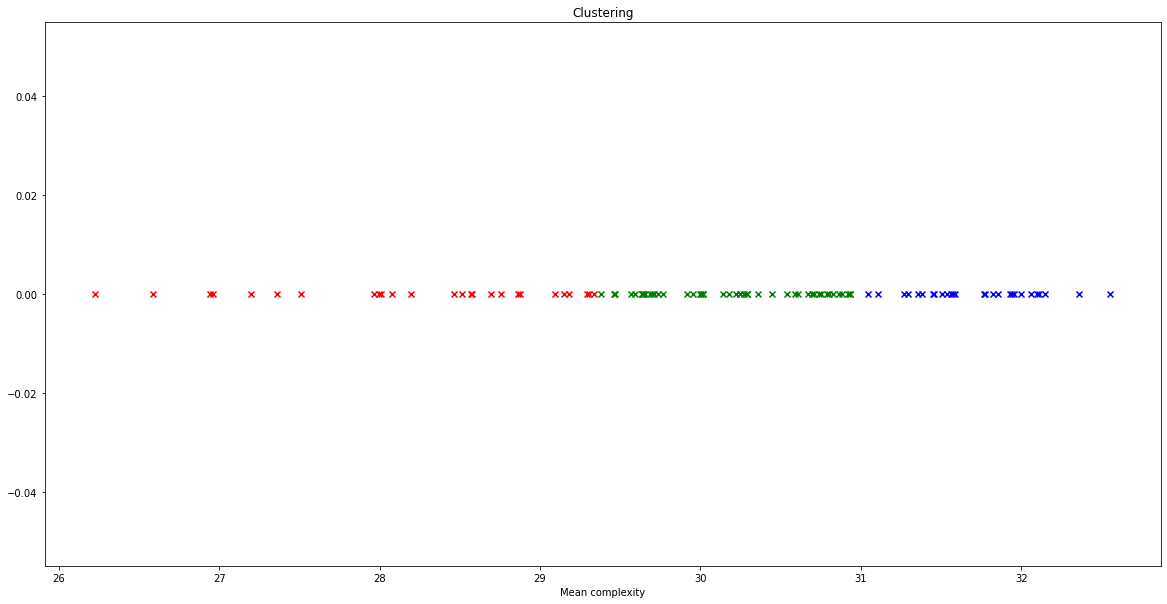

In [317]:
display_clustering(k_medoids(4))

### Clustering comparison

In [314]:
def display_comparison(algo) : #algo = k_means or k_medoids 
    plt.figure(figsize=(20,10))
    tab = algo(4)
    plt.subplot(3,1,1)
    Xr = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 0]
    Yr = [0 for i in range(len(tab)) if tab[i][2] == 0]
    Xg = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 1]
    Yg = [0 for i in range(len(tab)) if tab[i][2] == 1]
    Xb = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 2]
    Yb = [0 for i in range(len(tab)) if tab[i][2] == 2]

    plt.title('Clustering 4',)
    
    plt.scatter(Xr,Yr, c='red', marker='x')
    plt.scatter(Xg,Yg, c='green', marker='x')
    plt.scatter(Xb,Yb, c='blue', marker='x')
    
    tab = algo(8)
    plt.subplot(3,1,2)
    Xr = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 0]
    Yr = [0 for i in range(len(tab)) if tab[i][2] == 0]
    Xg = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 1]
    Yg = [0 for i in range(len(tab)) if tab[i][2] == 1]
    Xb = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 2]
    Yb = [0 for i in range(len(tab)) if tab[i][2] == 2]

    plt.title('Clustering 8',)
   
    plt.scatter(Xr,Yr, c='red', marker='x')
    plt.scatter(Xg,Yg, c='green', marker='x')
    plt.scatter(Xb,Yb, c='blue', marker='x')
    
    tab = algo(24)
    plt.subplot(3,1,3)
    Xr = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 0]
    Yr = [0 for i in range(len(tab)) if tab[i][2] == 0]
    Xg = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 1]
    Yg = [0 for i in range(len(tab)) if tab[i][2] == 1]
    Xb = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 2]
    Yb = [0 for i in range(len(tab)) if tab[i][2] == 2]

    plt.title('Clustering 24',)
    plt.xlabel('Mean complexity')
    plt.scatter(Xr,Yr, c='red', marker='x')
    plt.scatter(Xg,Yg, c='green', marker='x')
    plt.scatter(Xb,Yb, c='blue', marker='x')
    
    plt.show()

### Kmeans

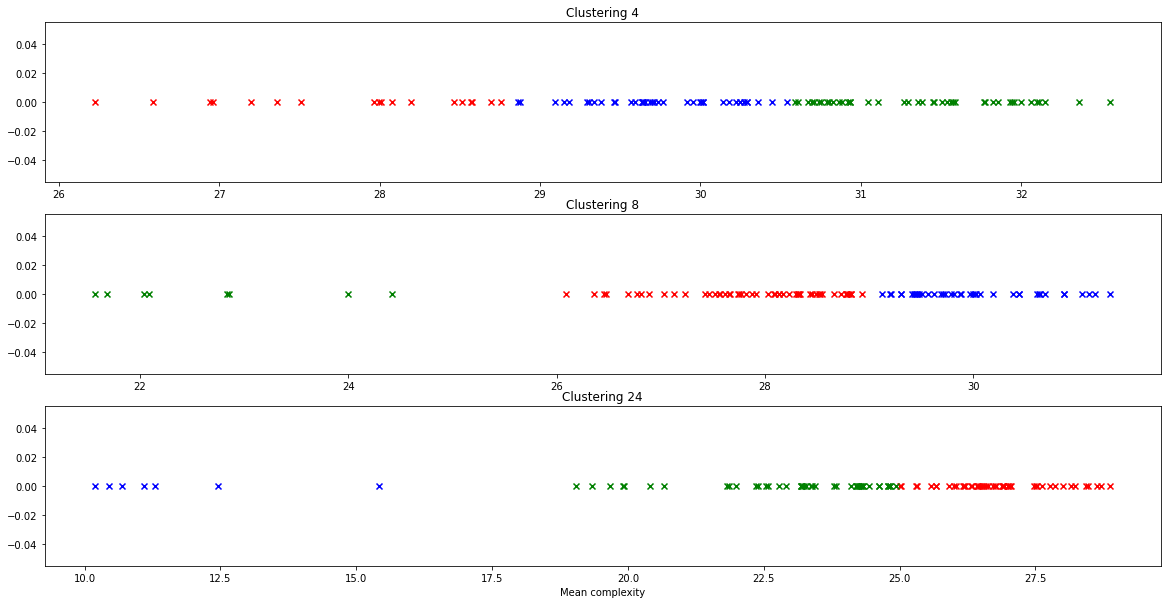

In [315]:
display_comparison(k_means)

### Kmedoid

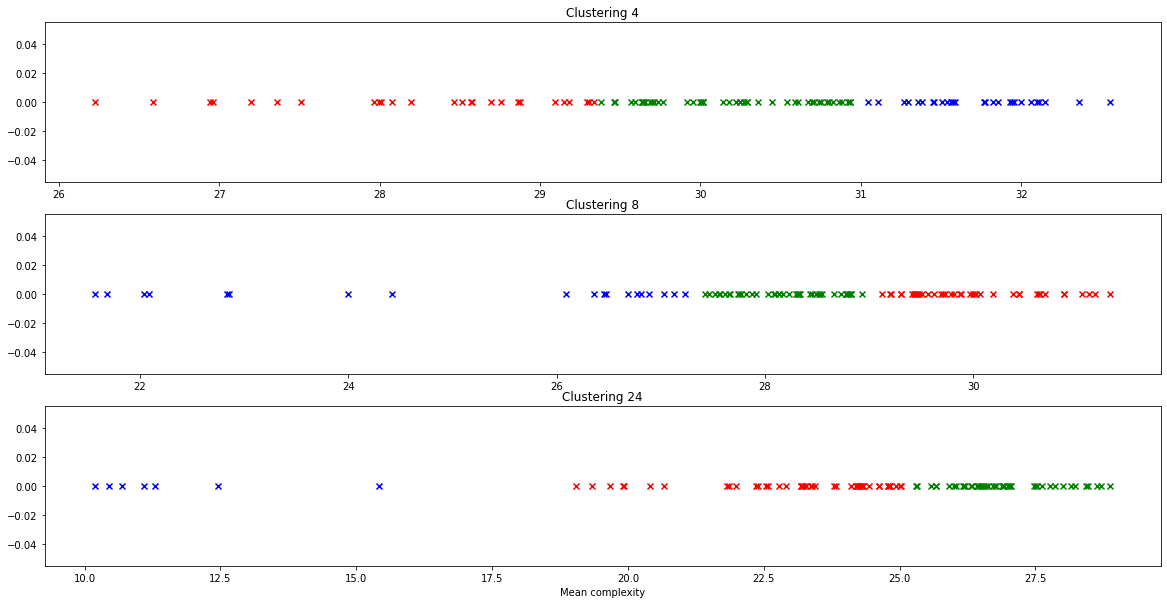

In [318]:
display_comparison(k_medoids)